<a href="https://colab.research.google.com/github/felipe-adriano/CEE2/blob/main/trabalho1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Trabalho 1 - CE2 Python**

No presente trabalho, foi analisada a dinâmica da Taxa SELIC ao longo do período de 01/05/2020 a 15/05/2020.

A coleta foi realizada por meio da API do Banco Central, especificamente na série temporal da Taxa SELIC, disponível no link:

🔗 https://dadosabertos.bcb.gov.br/dataset/11-taxa-de-juros---selic

## Acesso da API do Banco Central

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import numpy as np

In [ ]:
codigo_serie = "11"
dataInicial = "01/05/2020"
dataFinal = "15/05/2020"
url = f"https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json&dataInicial={dataInicial}&dataFinal={dataFinal}"

response = requests.get(url)

print( "type(response):", type(response) )

selic_json = response.json()

selic_df = pd.DataFrame(selic_json)

print(selic_df)

type(response): <class 'requests.models.Response'>
         data     valor
0  04/05/2020  0.014227
1  05/05/2020  0.014227
2  06/05/2020  0.014227
3  07/05/2020  0.011345
4  08/05/2020  0.011345
5  11/05/2020  0.011345
6  12/05/2020  0.011345
7  13/05/2020  0.011345
8  14/05/2020  0.011345
9  15/05/2020  0.011345


# Questões

## 2. Taxa Diária para Anual
Fórmula utilizada para conversão:

$$T_{anual} = (1+T_{diaria})^{252}-1$$
, onde:

- $T_{diaria}$ é a taxa diária expressa em valor decimal.
- O número 252 representa a quantidade aproximada de dias úteis em um ano.

In [ ]:
# Taxa Anual
selic_df = selic_df.rename(columns={'valor': 'selic_diaria'})

selic_df['selic_diaria'] = pd.to_numeric(selic_df['selic_diaria'], errors='coerce')


selic_df['selic_anual'] = (1 + selic_df['selic_diaria'])** 252 - 1
print(selic_df)

         data  selic_diaria  selic_anual
0  04/05/2020      0.014227    34.161087
1  05/05/2020      0.014227    34.161087
2  06/05/2020      0.014227    34.161087
3  07/05/2020      0.011345    16.164517
4  08/05/2020      0.011345    16.164517
5  11/05/2020      0.011345    16.164517
6  12/05/2020      0.011345    16.164517
7  13/05/2020      0.011345    16.164517
8  14/05/2020      0.011345    16.164517
9  15/05/2020      0.011345    16.164517


## 3. Taxa acumulada
Fórmula utilizada para conversão:
$$T_{acumulada}= \prod_{}^{}(1 + T_{diaria})-1$$
em que o produtório é calculado ao longo de todos os dias do período analisado.

In [ ]:
# SELIC Acumulada
selic_df['selic_acumulada'] = (( (1 + selic_df['selic_diaria'] / 100).cumprod() ) - 1)*100

print(selic_df)

         data  selic_diaria  selic_anual  selic_acumulada
0  04/05/2020      0.014227    34.161087         0.014227
1  05/05/2020      0.014227    34.161087         0.028456
2  06/05/2020      0.014227    34.161087         0.042687
3  07/05/2020      0.011345    16.164517         0.054037
4  08/05/2020      0.011345    16.164517         0.065388
5  11/05/2020      0.011345    16.164517         0.076740
6  12/05/2020      0.011345    16.164517         0.088094
7  13/05/2020      0.011345    16.164517         0.099449
8  14/05/2020      0.011345    16.164517         0.110805
9  15/05/2020      0.011345    16.164517         0.122163


## 4. Resultados em Planilha

In [ ]:
selic_df['data'] = pd.to_datetime(selic_df['data'], format='%d/%m/%Y')

selic_df['data'] = pd.to_datetime(selic_df['data']).dt.strftime('%d/%m/%Y')
print(selic_df.to_markdown(index=False))

| data       |   selic_diaria |   selic_anual |   selic_acumulada |
|:-----------|---------------:|--------------:|------------------:|
| 04/05/2020 |       0.014227 |       34.1611 |         0.014227  |
| 05/05/2020 |       0.014227 |       34.1611 |         0.028456  |
| 06/05/2020 |       0.014227 |       34.1611 |         0.0426871 |
| 07/05/2020 |       0.011345 |       16.1645 |         0.0540369 |
| 08/05/2020 |       0.011345 |       16.1645 |         0.065388  |
| 11/05/2020 |       0.011345 |       16.1645 |         0.0767405 |
| 12/05/2020 |       0.011345 |       16.1645 |         0.0880942 |
| 13/05/2020 |       0.011345 |       16.1645 |         0.0994492 |
| 14/05/2020 |       0.011345 |       16.1645 |         0.110805  |
| 15/05/2020 |       0.011345 |       16.1645 |         0.122163  |


## 5. Séries em Gráficos

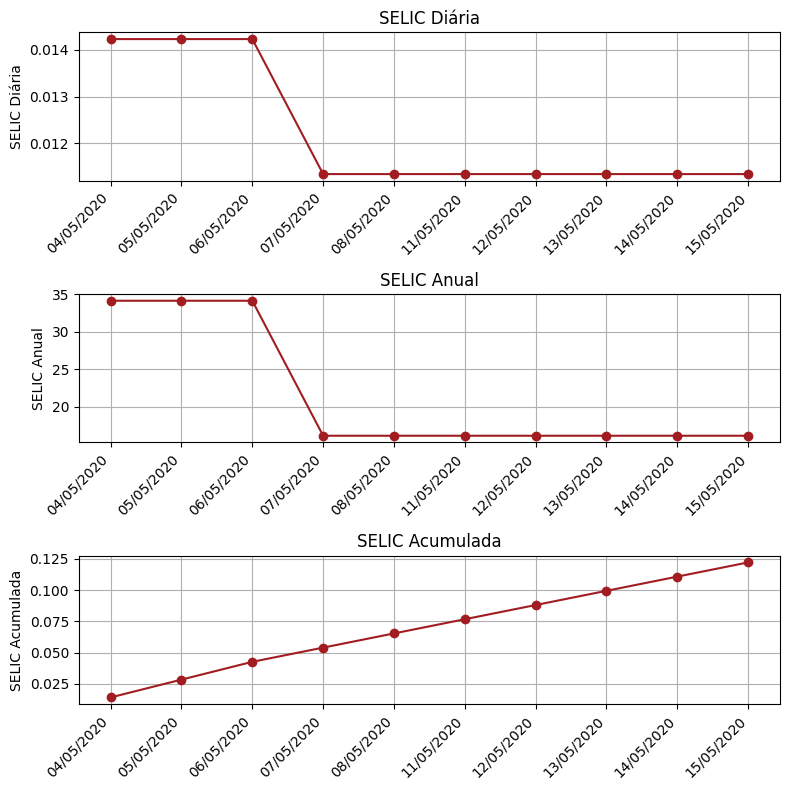

In [ ]:
plt.figure(figsize=(8, 8))

# DIÁRIA
plt.subplot(3, 1, 1)
plt.plot(selic_df['data'], selic_df['selic_diaria'], marker='o', color='#a11d21')
plt.title('SELIC Diária')
plt.ylabel('SELIC Diária')
plt.grid(True)
plt.xticks(rotation=45, ha='right')

# ANUAL
plt.subplot(3, 1, 2)
plt.plot(selic_df['data'], selic_df['selic_anual'], marker='o', color='#a11d21')
plt.title('SELIC Anual')
plt.ylabel('SELIC Anual')
plt.grid(True)
plt.xticks(rotation=45, ha='right')

# ACUMULADA
plt.subplot(3, 1, 3)
plt.plot(selic_df['data'], selic_df['selic_acumulada'], marker='o', color='#a11d21')
plt.title('SELIC Acumulada')
plt.ylabel('SELIC Acumulada')
plt.grid(True)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## 6. Período com a maior taxa de juros (anual)

In [ ]:
maior_taxa = selic_df.loc[selic_df['selic_anual'].idxmax()]

print(f"O período com a maior taxa de juros foi {maior_taxa['data']}, onde a taxa foi de {maior_taxa['selic_anual']:.2f}% ao ano.")

O período com a maior taxa de juros foi 04/05/2020, onde a taxa foi de 34.16% ao ano.


## 6. Período com a menor taxa de juros (anual)

In [ ]:
menor = selic_df.loc[selic_df['selic_anual'].idxmin()]

print(f"O período com a menor taxa de juros foi {menor['data']}, onde a taxa foi de {menor['selic_anual']:.2f}% ao ano.")

O período com a menor taxa de juros foi 07/05/2020, onde a taxa foi de 16.16% a.a..


## 7. Simulação de investimento único

Fórmula utilizada para simulação:

$$V=V_{inicial}\prod_{}^{}(1+T_{diária})$$
, onde:
- $V$ é o valor acumulado no final do período.
- $V_{inicial}$ é o valor aplicado no início.

In [ ]:
df_simulacao= selic_df[["data", "selic_diaria"]].copy()

valor= float(input("Digite o valor a ser investido: "))

df_simulacao["fator"]= 1 + (df_simulacao["selic_diaria"]/100)

df_simulacao["$"]= valor * df_simulacao["fator"].cumprod()

df_simulacao= df_simulacao.drop(columns=["fator"])

print(df_simulacao.to_markdown(index=False))

Digite o valor a ser investido: 1250
| data       |   selic_diaria |       $ |
|:-----------|---------------:|--------:|
| 04/05/2020 |       0.014227 | 1250.18 |
| 05/05/2020 |       0.014227 | 1250.36 |
| 06/05/2020 |       0.014227 | 1250.53 |
| 07/05/2020 |       0.011345 | 1250.68 |
| 08/05/2020 |       0.011345 | 1250.82 |
| 11/05/2020 |       0.011345 | 1250.96 |
| 12/05/2020 |       0.011345 | 1251.1  |
| 13/05/2020 |       0.011345 | 1251.24 |
| 14/05/2020 |       0.011345 | 1251.39 |
| 15/05/2020 |       0.011345 | 1251.53 |


## 8. Simulação de investimento recorrente

Fórmula utilizada para simulação:

$$ V= \sum_{i=1}^{n}Aporte \prod_{j=i}^{n}(1+ T_{diária})$$
Onde:
- $V$ é o valor acumulado no final do período.
- $Aporte$ é o valor aplicado diariamente.
- O produtório $\prod_{j=i}^{n}$ representa o rendimento do aporte feito no dia $i$ até o final do período no dia $n$.

In [ ]:
investimento = float(input('Digite o valor do investimento diário: '))

df_simulacao_recorrente = selic_df[["data", "selic_diaria"]].copy()

df_simulacao_recorrente["fator"] = 1 + (df_simulacao_recorrente["selic_diaria"] / 100)

valores = []
for i in range(len(df_simulacao_recorrente)):
    fator_acumulado = df_simulacao_recorrente["fator"].iloc[i:]
    valor_dia = aporte * fator_acumulado.cumprod().iloc[-1]
    valores.append(valor_dia)

df_simulacao_recorrente["Valor Acumulado (R$)"] = pd.Series(valores).cumsum()

df_simulacao2 = df_simulacao_recorrente.drop(columns=["fator"])

print("\n")
print(df_simulacao_recorrente.to_markdown(index=False))

Digite o valor do investimento diário: 100


| data       |   selic_diaria |   fator |   Valor Acumulado (R$) |
|:-----------|---------------:|--------:|-----------------------:|
| 04/05/2020 |       0.014227 | 1.00014 |                100.122 |
| 05/05/2020 |       0.014227 | 1.00014 |                200.23  |
| 06/05/2020 |       0.014227 | 1.00014 |                300.324 |
| 07/05/2020 |       0.011345 | 1.00011 |                400.403 |
| 08/05/2020 |       0.011345 | 1.00011 |                500.471 |
| 11/05/2020 |       0.011345 | 1.00011 |                600.528 |
| 12/05/2020 |       0.011345 | 1.00011 |                700.573 |
| 13/05/2020 |       0.011345 | 1.00011 |                800.607 |
| 14/05/2020 |       0.011345 | 1.00011 |                900.63  |
| 15/05/2020 |       0.011345 | 1.00011 |               1000.64  |
